In this lab we will analyze spike train data collected in an "experiment".  You will load the data in Python, and then analyze the data using the techniques we discussed in lecture.

## Part 1:  Load and visualize the data.

The spike train data consists of 1000 trials, each lasting 500 ms with a sampling rate of 1000 Hz.

> **_ Q:_** Given this, how many samples will you have per trial?

Load the data `Ch3_d1.mat`

In [1]:
from scipy.io import loadmat       # Import function to read data.
data = loadmat('Ch3_d2.mat')
d    = data['d']

Upon loading these data, your workspace should hold a single variable `d`.

> **_ Q:_**  What are the dimensions of `d`?

It's useful to define two new variables that record the number of trials, and the length of each trial.

> **_ Q:_** Define two new variables, `n_trials` for the total number of trials, and `T` for the total number of time indices.


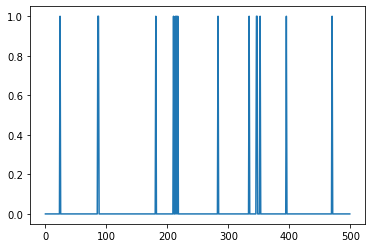

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat       # Import function to read data.
data = loadmat('Ch3_d1.mat')
d    = data['d']

n_trials = 1000
T = 0.5

plt.plot(d[0])

Notice that here we've used the entire length of the data (500 ms) as our counting window.

> **_ Q:_**  To get a sense for the data, plot the results from a single trial.

> **_ Q:_**  What values do the data assume?  What constitutes a spike?

> **_ Q:_**  Visual inspection of data is a powerful tool.  Describe what you "see" in the plot.  In this single trial, does the neuron spike "a lot" or "a little"?  Estimate the number of spikes in this trial.

> **_ Q:_**  The results for one trial can be deceiving.  Visualize the output of additional trials.  Do you notice any consistency?

> **_ Q:_** One way to characterize the data is to count the number of spikes  per trial.  For trials 1-5, plot each trial (as above) and count the number of spikes.  Save your results and show them to me, or to someone else in
class, and compare your results.


## Part 2:  Quantify the spiking

Through visual inspection, we've examined the spiking for a handful of trials, and counted the number of spikes per trial.  Let's now attempt to summarize the data for *all* trials.

We could try to do this by hand (as in the previous exercise). But counting spikes by hand is TEDIOUS.  Imagine repeating this procedure for 1000 trials!  We can more effectively count the number of spikes per trial by issuing a command in MATLAB.  Consider the following,

> **_ Q:_** Define a new variable `n_spikes_per_trial` as the number of spikes per trial.  What MATLAB function will you use to define this variable?  What should be the dimensions of this new variable?

In [ ]:
n_spikes_per_trial = ???

> **_ Q:_** Compare your results counting the number of spikes in trials 1-5 (found through visual inspection above) with the first five elements of the variable `n_spikes_per_trial`.  Do the two match?

> **_ Q:_** Now, compute the average number (or mean number) of spikes per trial. Use a single MATLAB command to do so.  Please save your results in a variable called `n_avg`.


In [ ]:
n_avg = ???

> **_ Q:_**  What is the numerical value for `n_avg`?  Is this consistent with your visual inspection of the data?


## Histograms

We've learned one quantitative element about the data:  the mean number of spikes per trial.  To learn more about the data, let's compute a histogram of the number of spikes per trial.  This is the "spike number histogram" (SNH).  Consider the following snippet of code:

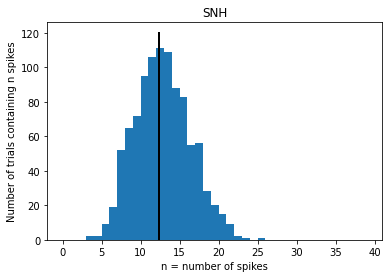

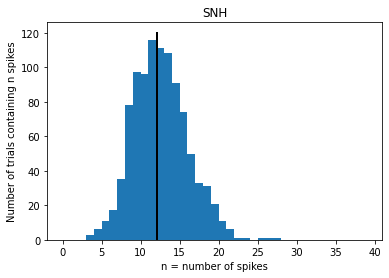

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat       # Import function to read data.
data = loadmat('Ch3_d1.mat')
d    = data['d']

n_trials = 1000
T = 0.5

n_spikes_per_trial = np.sum(d,1)
mean = np.mean(n_spikes_per_trial)

plt.plot([mean, mean], [0,120], 'k', lw=2)

plt.hist(n_spikes_per_trial, np.arange(40))
plt.xlabel('n = number of spikes')
plt.ylabel('Number of trials containing n spikes')
plt.title('SNH');

plt.figure()
data = loadmat('Ch3_d2.mat')
d    = data['d']

n_trials = 1000
T = 0.5

n_spikes_per_trial = np.sum(d,1)
mean = np.mean(n_spikes_per_trial)

plt.plot([mean, mean], [0,120], 'k', lw=2)

plt.hist(n_spikes_per_trial, np.arange(40))
plt.xlabel('n = number of spikes')
plt.ylabel('Number of trials containing n spikes')
plt.title('SNH');

> **_ Q:_**  Remember the `hist` command?

> **_ Q:_**  Why do we input two arguments to the `hist` command?  What is the purpose of the second argument?  Vary the second argument in `hist` and re-execute the snippet of code above.  Examine how the histogram plot
changes.

Python plots the histogram.  The horizontal axis indicates the number of spikes observed in a trial -- let's call this 'n'.  The vertical axis indicates the number of trials that contain n spikes.  To make this clear, we label the axes, and we title the plot:

```
plt.xlabel('n = number of spikes');
plt.ylabel('Number of trials containing n spikes');
plt.title('SNH')
```
> **_ Q:_** (*OPTIONAL* Mini-challenge): Include on the plot the mean number of
spikes per trial.  Please do this graphically. 

> **_ Q:_** (*OPTIONAL* Mini-challenge):  Include text on the plot that prints
the numerical value of the mean number of spikes per trial.


## Part 4:  Average firing rate

> **_ Q:_** IN LAB Q:  Use your results above to compute the average firing rate of the data. Tell me what you find in lab, or compare with a classmate. *HINT:* It's one line of code!  See your lecture notes ...


## Part 5:  ISI

We've spent some time considering the number of spikes per trial, and visualized these results in the SNH.  Let's now investigate the *time intervals* between spikes.  Namely, let's compute the ISIs (InterSpike Intervals).

First, we have to convert the observed data `d` to a list of ISIs. Remember, the data `d` indicates the *time* of each spike (in each trial). What we'd like to know now is the time *between* spikes.  To compute the time between spikes, we'll do the following:


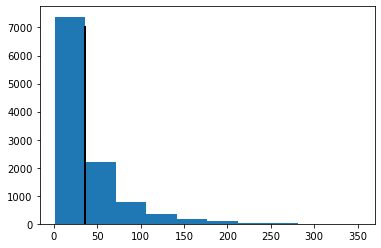

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat       # Import function to read data.
data = loadmat('Ch3_d2.mat')
d    = data['d']

n_trials = 1000
T = 0.5

ISI = [];
for k in np.arange(n_trials):
    spike_times = np.where(d[k,:] == 1);
    isi0 = np.diff(spike_times);
    ISI = np.concatenate([ISI, isi0[0]]);
mean_ISI = np.mean(ISI);
plt.hist(ISI);
plt.plot([mean_ISI, mean_ISI], [0,7000], 'k', lw=2)
# prob_spike = np.sum(d,0)/n_trials;
# plt.plot(prob_spike)
plt.show()

> **_ Q:_**  That's a complicated series of commands!  Study it and explain it to a classmate or me.  Use MATLAB Help to look up commands you don't yet know.

> **_ Q:_**  Execute the commands above and examine the vector ISI.  What is it's size?  Does it make sense to you?

Once we've constructed the vector ISI, we can calculte its mean,

In [14]:
mean_ISI = np.mean(ISI)

> **_ Q:_** Examine the value of the mean ISI.  Does it seem reasonable?  Why (or why not)?

> **_ Q:_** Construct a histogram of the ISI.  How does it compare to the mean ISI?


## Part 6: PSTH

We also discussed in class the poststimulus time histogram, or PSTH. To compute the PSTH, we first need to compute the probability of a spike at any moment in time.  Consider the following code:


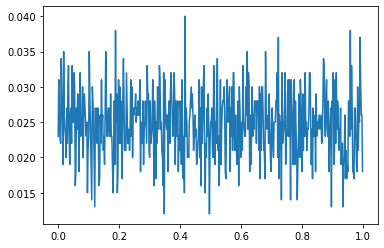

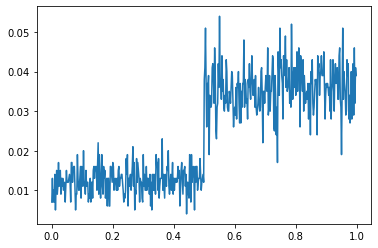

35.62446952595937
36.952485895627646


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat       # Import function to read data.
data = loadmat('Ch3_d1.mat')
d    = data['d']

n_trials = 1000
T = 0.5

ISI = [];
for k in np.arange(n_trials):
    spike_times = np.where(d[k,:] == 1);
    isi0 = np.diff(spike_times);
    ISI = np.concatenate([ISI, isi0[0]]);
mean_ISI = np.mean(ISI);
prob_spike = np.sum(d,0)/n_trials;
plt.plot(np.arange(0,1,0.002),prob_spike);
plt.show();
plt.figure();
data = loadmat('Ch3_d2.mat')
d    = data['d']

n_trials = 1000
T = 0.5

ISI = [];
for k in np.arange(n_trials):
    spike_times = np.where(d[k,:] == 1);
    isi0 = np.diff(spike_times);
    ISI = np.concatenate([ISI, isi0[0]]);
mean_ISI2 = np.mean(ISI);
prob_spike = np.sum(d,0)/n_trials;
plt.plot(np.arange(0,1,0.002),prob_spike);
plt.show();
print(mean_ISI2)
print(mean_ISI)

> **_ Q:_** Why does this line of code reveal the probability of spiking at any
moment in time?

> **_ Q:_** Use the above line of code to compute the PSTH, and plot it as a function of time.  In the line of code above, what is the size of the tiny bin used to divide the time axis?  How does the instantaneous frequency evolve over time?


## Part 7:  Fano.

In class, we determined a method to check if a data set exhibits
  Poisson properties:  compute the Fano factor.  Remember, a Poisson
  model is a *very* simple statistical model for how a spike train may
  behave.  To test whether our data is consistent with a Poisson model,
  we must first compute the mean and variance in the number of spikes per
  trial.  We've already computed the mean. So ...

> **_ Q:_**  Compute the variance in the number of spikes per trial.
*HINT:*  You'll need to implement a command to compute the "variance" . . .

The formula for the Fano factor is:

```
  FANO =  [variance in the # of spikes per trial] / [average # spikes per trial]
```

> **_ Q:_**  What is the Fano factor for `d`?  Compare with your
classmates.

> **_ Q:_**  Based on your calculation, do you think the data is Poisson?


average per trial: 5.16
average firing rate: 10.32
average ISI: 0.0763021582733813
fano: 0.9562790697674418


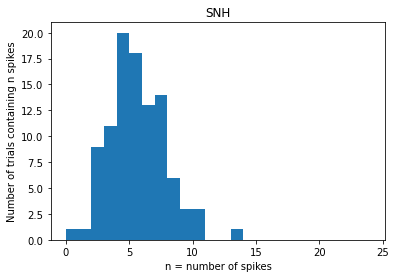

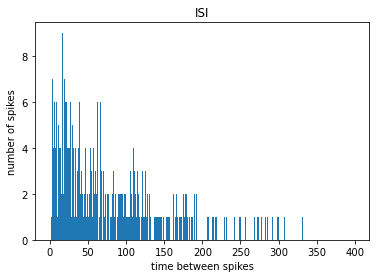

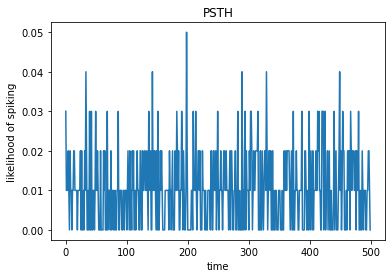

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat       # Import function to read data.
n_trials = 100;
n_bins = 500; 
data = np.zeros([n_trials,n_bins]);
p= 0.01;
T = 0.5

for k in range(n_trials):
    data[k,:] = [np.random.binomial(1,p) for i in range(n_bins)]

d = data

n_spikes_per_trial = np.sum(d,1)
average = np.mean(n_spikes_per_trial)
variance = np.var(n_spikes_per_trial)

ISI = [];
for k in np.arange(n_trials):
    spike_times = np.where(d[k,:] == 1);
    isi0 = np.diff(spike_times);
    ISI = np.concatenate([ISI, isi0[0]]);

fano = variance/average
print("average per trial: " + str(average))
print("average firing rate: " + str(average/T))
print("average ISI: " + str(np.mean(ISI)/1000))
print("fano: " + str(fano))
plt.figure()
plt.hist(n_spikes_per_trial, np.arange(25))
plt.xlabel('n = number of spikes')
plt.ylabel('Number of trials containing n spikes')
plt.title('SNH');

plt.figure()
plt.hist(ISI,range(400))
plt.xlabel('time between spikes')
plt.ylabel('number of spikes')
plt.title('ISI');

plt.figure()
prob_spike = np.sum(d,0)/n_trials;
plt.plot(prob_spike);

plt.xlabel('time')
plt.ylabel('likelihood of spiking')
plt.title('PSTH');